<a href="https://www.kaggle.com/code/barramalikwibowo/rice-leaf-diseases-detection?scriptVersionId=154352930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Rice Leaf Diseases Detection

Rice Leaf Diseases Detection ini merupakan salah satu fitur dari project yang sedang kami buat dalam rangka menyelesaikan tugas capstone project

## Input

### Library

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Flatten, Dense

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

### Dataset

In [2]:
train_data = '/kaggle/input/rice-diseases/Rice Leaf Diseases/train'
valid_data = '/kaggle/input/rice-diseases/Rice Leaf Diseases/val'

In [3]:
classes=[]
for file in os.listdir(train_data):
    classes+=[file]
print(classes)
print(len(classes))

['Hispa', 'Healthy', 'BrownSpot', 'LeafBlast']
4


In [4]:
brownspot = [train_data + '/BrownSpot/' + img for img in os.listdir(train_data + '/BrownSpot')[:9]]
healthy = [train_data  + '/Healthy/' + img for img in os.listdir(train_data + '/Healthy')[:9]]
hispa = [train_data  + '/Hispa/' + img for img in os.listdir(train_data + '/Hispa')[:9]]
leafblast = [train_data  + '/LeafBlast/' + img for img in os.listdir(train_data + '/LeafBlast')[:9]]

#### Brown Spot

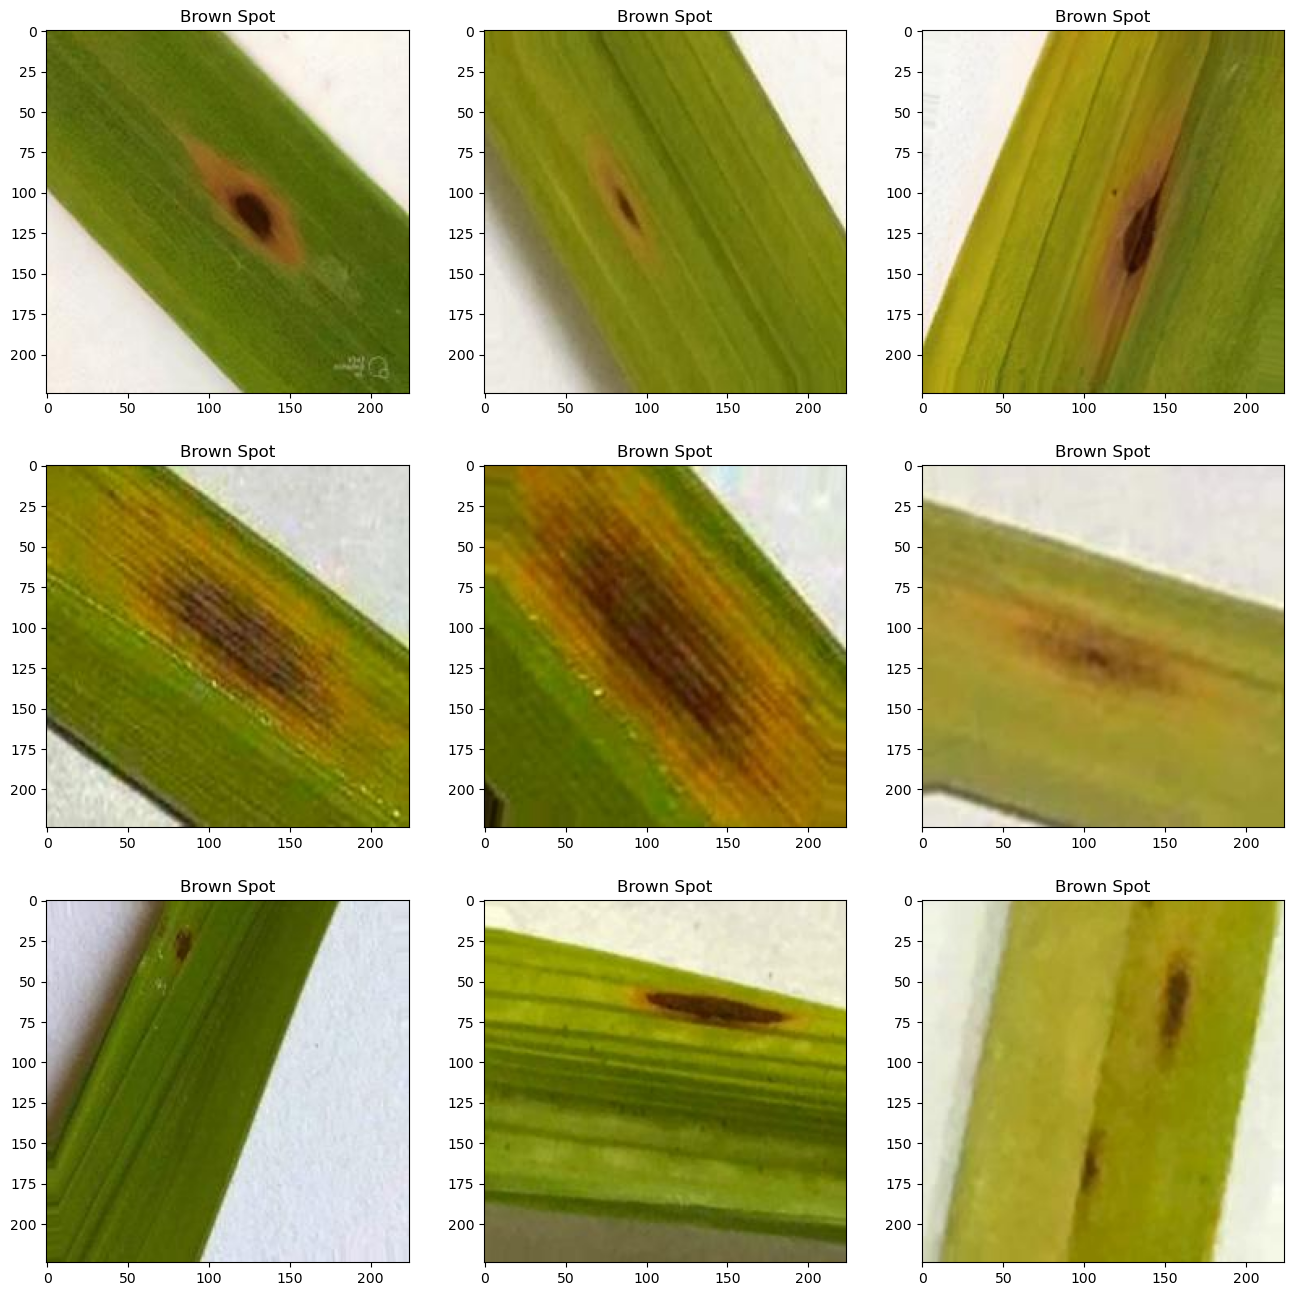

In [5]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

#### Hispa

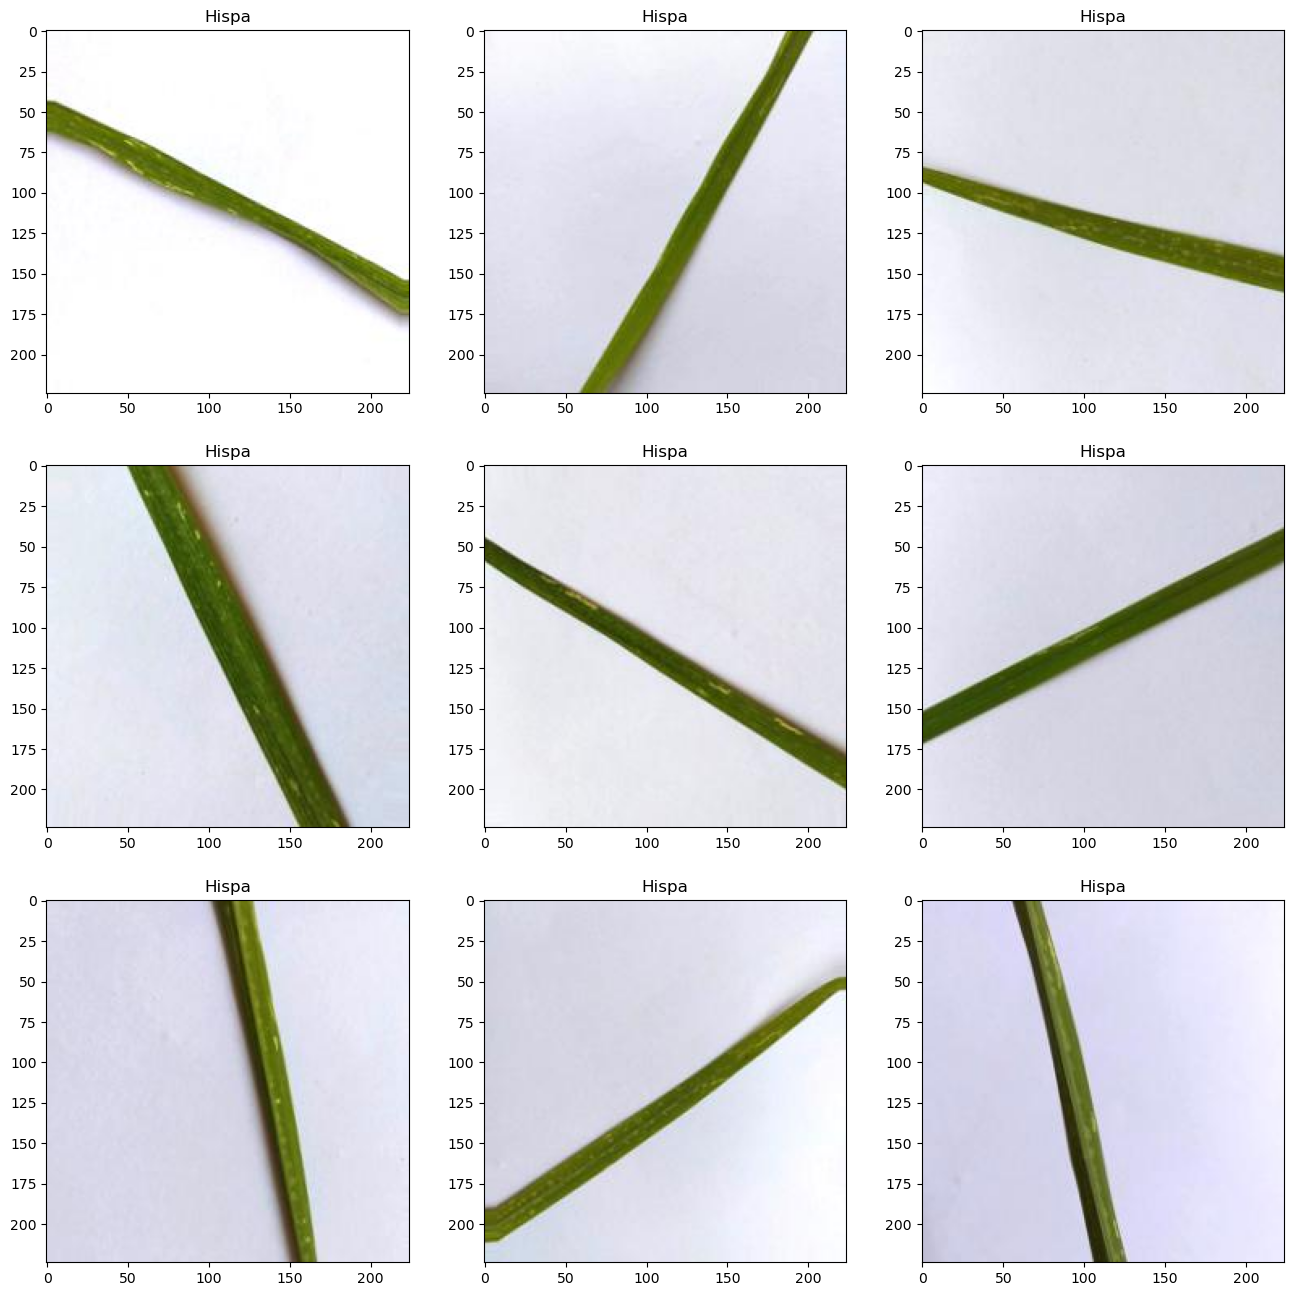

In [6]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

#### Leaf Blast

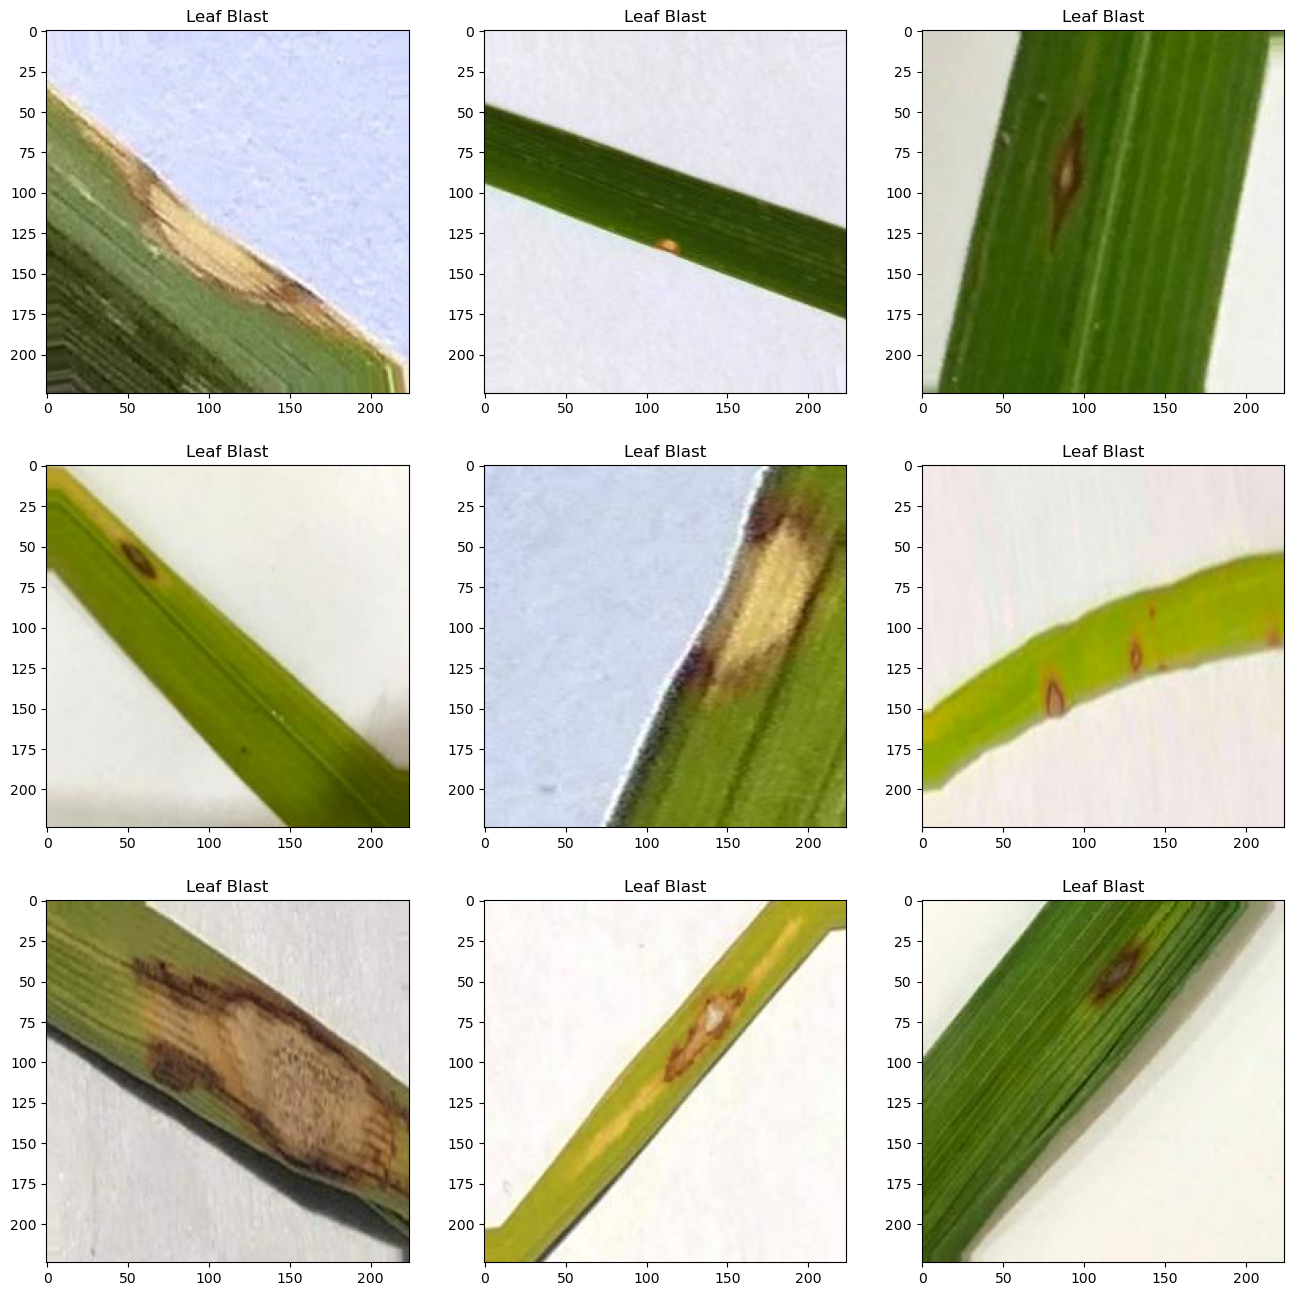

In [7]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

#### Healthy

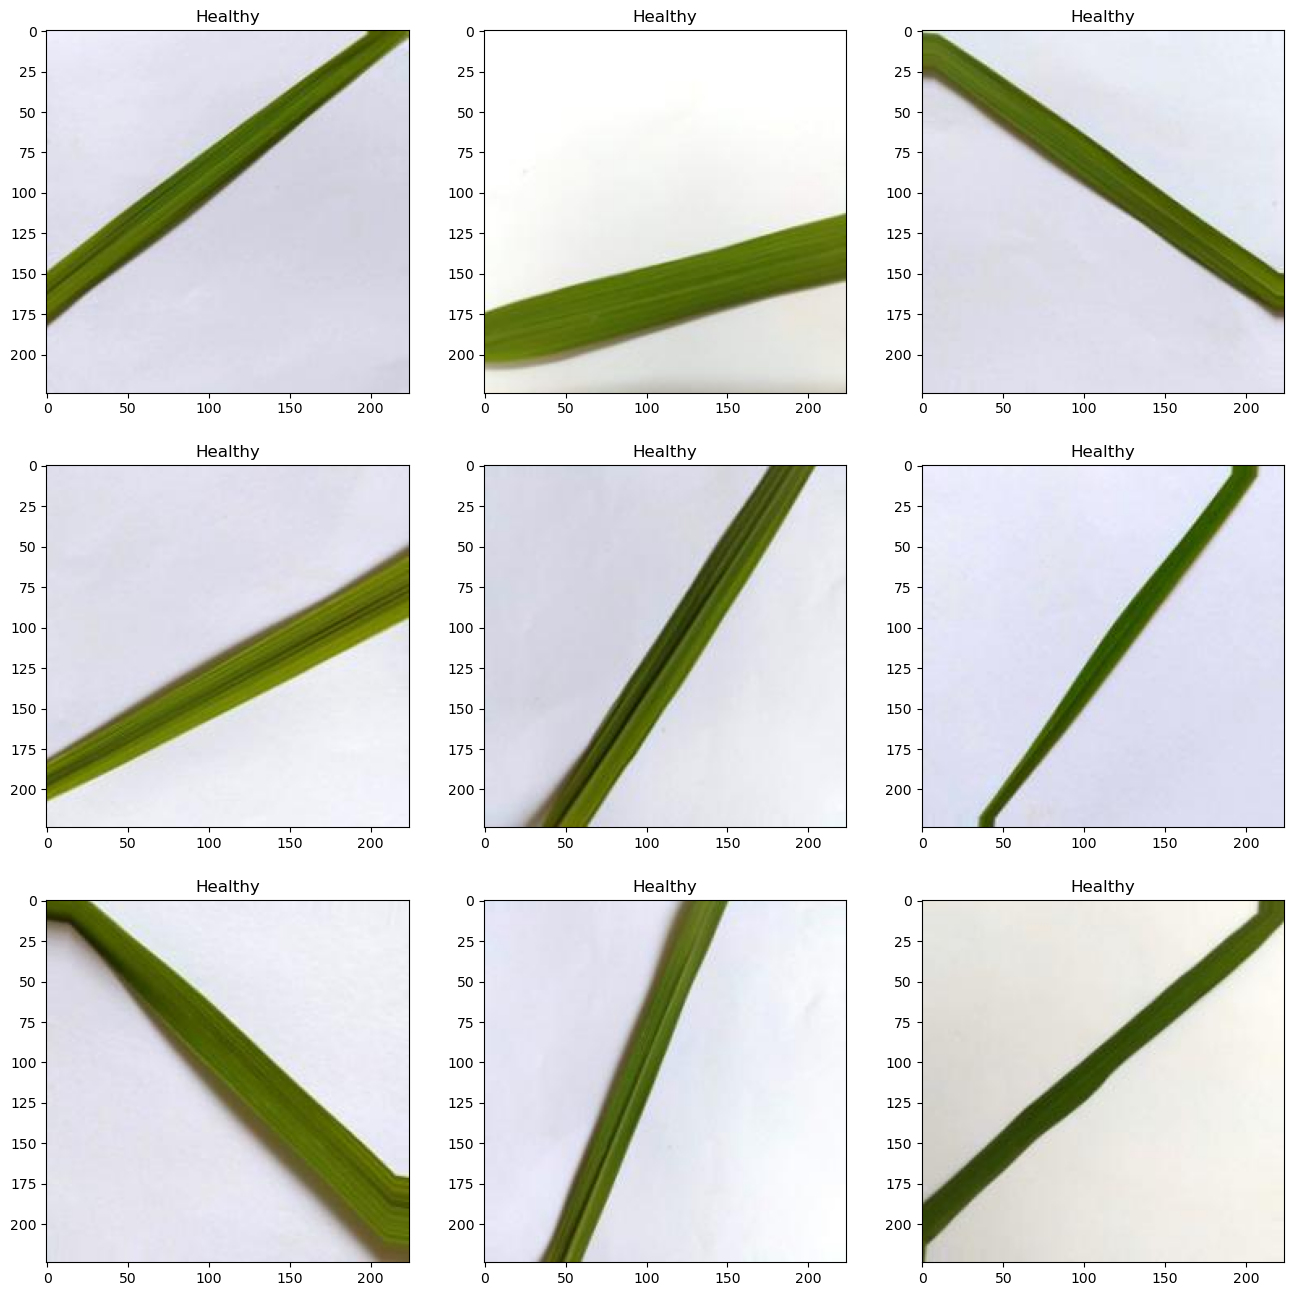

In [8]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

In [9]:
dataGenerator = ImageDataGenerator(rescale= 1. / 255)
train_data = dataGenerator.flow_from_directory(
    train_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)
val_data = dataGenerator.flow_from_directory(
    valid_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

Found 3374 images belonging to 4 classes.
Found 843 images belonging to 4 classes.


In [10]:
# Access one batch from the training data
for images, labels in train_data:
    print("Shape of training images:", images.shape)
    break  # We break the loop as we only need to inspect one batch

# Access one batch from the validation data
for images, labels in val_data:
    print("Shape of validation images:", images.shape)
    break  # Break after getting one batch

Shape of training images: (32, 224, 224, 3)
Shape of validation images: (32, 224, 224, 3)


## Model

#### Resnet

In [11]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base_model.trainable = False

In [12]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 4)                 401412    
                                                                 
Total params: 23,966,212
Trainable params: 401,412
Non-trainable params: 23,564,800
_________________________________________________________________


In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
early_stopping_cb = callbacks.EarlyStopping(monitor="val_accuracy", patience=3)
checkpoint_path = "./Checkpoint/"
model_checkpoint = callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_accuracy")
history = model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[early_stopping_cb, model_checkpoint])

Epoch 1/20
106/106 [==============================] - 22s 146ms/step - loss: 1.2207 - accuracy: 0.8545 - val_loss: 0.7235 - val_accuracy: 0.9098
Epoch 2/20
106/106 [==============================] - 12s 116ms/step - loss: 0.1522 - accuracy: 0.9745 - val_loss: 0.2561 - val_accuracy: 0.9656
Epoch 3/20
106/106 [==============================] - 12s 111ms/step - loss: 0.0654 - accuracy: 0.9858 - val_loss: 0.3021 - val_accuracy: 0.9609
Epoch 4/20
106/106 [==============================] - 12s 114ms/step - loss: 0.0298 - accuracy: 0.9929 - val_loss: 0.2272 - val_accuracy: 0.9739
Epoch 5/20
106/106 [==============================] - 12s 108ms/step - loss: 0.0278 - accuracy: 0.9938 - val_loss: 0.3351 - val_accuracy: 0.9549
Epoch 6/20
106/106 [==============================] - 12s 109ms/step - loss: 0.1173 - accuracy: 0.9840 - val_loss: 0.3158 - val_accuracy: 0.9549
Epoch 7/20
106/106 [==============================] - 12s 111ms/step - loss: 0.1288 - accuracy: 0.9849 - val_loss: 0.2193 - val_ac

## Save Model

In [15]:
model.save('./model.h5')
model.save('./model')
model.save('./model.tflite')

## Evaluate

### Loss & Accuracy

In [16]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2) 
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

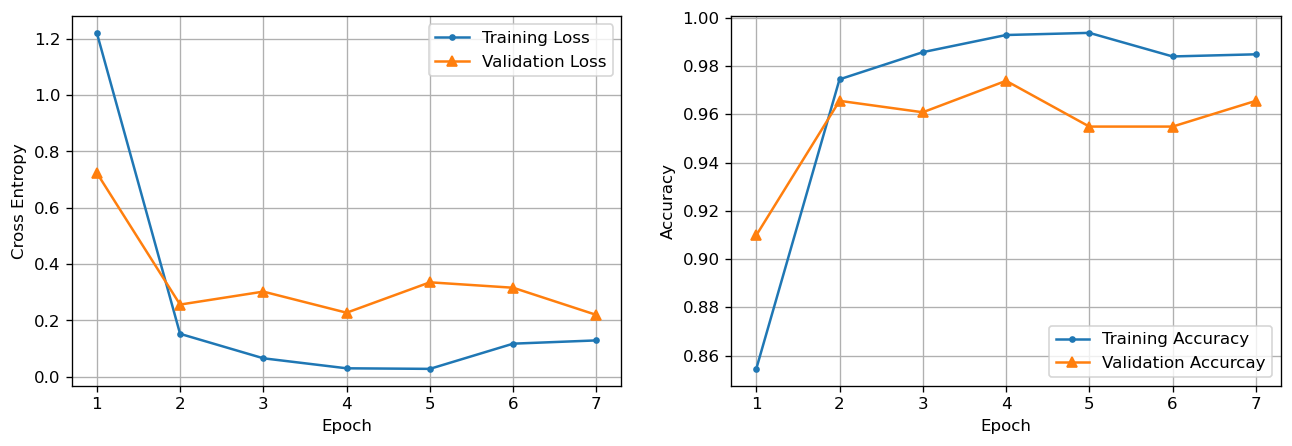

In [17]:
plot_training_curves(pd.DataFrame(history.history))